## Hypothesis testing

In [18]:
# importing required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# runing the functions script
%run stats_func.py

In [2]:
# loading the iris dataset
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# for further analysis sepal length and sepal width will be used
sepalLength = np.array(df['SepalLengthCm'])
sepalWidth = np.array(df['SepalWidthCm'])

# the plot above is for all iris spieces, which can be listed via:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# the remaining analysis will focus only on Iris-setosa
sepalLengthSetosa = np.array(df['SepalLengthCm'][df['Species'] == 'Iris-setosa'])
sepalWidthSetosa = np.array(df['SepalWidthCm'][df['Species'] == 'Iris-setosa'])
sepalLengthVirginica = np.array(df['SepalLengthCm'][df['Species'] == 'Iris-virginica'])

### Samples permutation

Special function is defined to mix the data (that should be very similar):

    def permutation_sample(data1, data2):
        """Generate a permutation sample from two data sets."""

        # Concatenate the data sets: data
        data = np.concatenate((data1, data2))

        # Permute the concatenated array: permuted_data
        permuted_data = np.random.permutation(data)

        # Split the permuted array into two: perm_sample_1, perm_sample_2
        perm_sample_1 = permuted_data[:len(data1)]
        perm_sample_2 = permuted_data[len(data1):]

        return perm_sample_1, perm_sample_2

In [13]:
(np.mean(sepalLengthSetosa), np.mean(sepalLengthVirginica))

(5.0060000000000002, 6.5879999999999983)

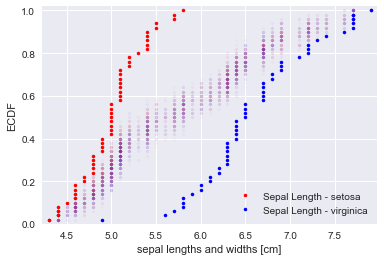

In [14]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(sepalLengthSetosa, sepalLengthVirginica)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(sepalLengthSetosa)
x_2, y_2 = ecdf(sepalLengthVirginica)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', label='Sepal Length - setosa')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', label='Sepal Length - virginica')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('sepal lengths and widths [cm]')
_ = plt.ylabel('ECDF')
plt.legend();

### Comparison of means

for this purpose a new function is defined - draw permutation replicates, that uses permutation samples function inside:

    def draw_perm_reps(data_1, data_2, func, size=1):
        """Generate multiple permutation replicates."""

        # Initialize array of replicates: perm_replicates
        perm_replicates = np.empty(size)

        for i in range(size):
            # Generate permutation sample
            perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

            # Compute the test statistic
            perm_replicates[i] = func(perm_sample_1, perm_sample_2)

        return perm_replicates
        
For this example difference of means is looked at

In [15]:
# definition of the difference of means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [17]:
# empirical difference of means
empirical_diff_means = diff_of_means(sepalLengthSetosa, sepalLengthVirginica)
empirical_diff_means

-1.5819999999999981

In [19]:
# permutation replicates
perm_replicates = draw_perm_reps(sepalLengthSetosa, sepalLengthVirginica, diff_of_means, size=10000)

In [21]:
# computing p-value
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
p

0.0